###### **autoformat**

In [ ]:
!pip install black
%load_ext black

###### **config for working with GD directly**

In [ ]:
# монтируем гугл диск в директорию '/content/drive/'
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

import sys

# прописываем путь к директории
path_to_folder = '/content/drive/MyDrive/algorithms/2s'

# добавляем этот путь в sys.path, чтобы Python мог искать там модули
if path_to_folder not in sys.path:
    sys.path.append(path_to_folder)

%cd algorithms-2s/lab1

###### **clone repo and config sys.path**

In [ ]:
!git clone https://github.com/Denisonya/algorithms-2s.git

import sys

# прописываем путь к директории
path_to_folder = '/content/algorithms-2s'

# добавляем этот путь в sys.path, чтобы Python мог искать там модули
if path_to_folder not in sys.path:
    sys.path.append(path_to_folder)

%cd algorithms-2s/lab1

###### **imports**

In [ ]:
import importlib

# мои модули
import utils

# перезагружаем модуль
importlib.reload(utils)

from utils import time_and_memory_decorator, get_direct_drive_link

In [ ]:
get_direct_drive_link('')

# копируем ссылку на файл с гугл диска и затем конвертируем ее в прямую ссылку с помощью функции get_direct_drive_link()
# <img src="https://drive.google.com/uc?id=1fgRZ8fk9Dx-9RddnLXbtACssxdbilH5w" weight="" height=""/>

###### **title**

<h1></h1>

<div align="center">
  <h1><b>Министерство науки и высшего образования Российской Федерации</b></h1>

  <h1>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ
  </h1>

  <h1><b>НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ ИТМО</b></h1>

  <h1>ITMO University</h1>

  <h1>ФАКУЛЬТЕТ ПРИКЛАДНОЙ ИНФОРМАТИКИ</h1>

  <br><br>

  <h3>Отчет по лабораторной работе №1</h3>
  <h3>по дисциплине «Алгоритмы и структуры данных»</h3>
  <h3>Тема: Тема работы</h3>
  <h3>Вариант 1</h3>
</div>

<br><br>

<div align="right">
  <h5><b>Выполнил:</b></h5>
  <h5>Баранов Д.С.</h5>
  <h5>К3140</h5>

  <br>

  <h5><b>Проверил:</b></h5>
  <h5>Царьков Г.И.</h5>
</div>

<br><br>

<div align="center">
  <h5>Санкт-Петербург</h5>
  <h5>2026 г.</h5>
</div>


<h1></h1>

<div align="center">
  <h1><b>Содержание отчета</b><h1>
</div>

| Раздел                                                | Страница |
|:------------------------------------------------------|:--------:|
| **Задачи по варианту**                                |    1     |
| Задача №1. Максимальная стоимость добычи [0.5 баллов] |    2     |
| **Дополнительные задачи**                             |    3     |
| Задача №1. Название задачи [N баллов]                 |    4     |
| **Вывод**                                             |    5     |

<h1></h1>

<div align="center">

# **Задачи по варианту**

</div>

---

### **Задача №1. Максимальная стоимость добычи [0.5 балла]**

<div align="justify">

Вор находит гораздо больше добычи, чем может поместиться в его сумке.
Помогите ему найти самую ценную комбинацию предметов, предполагая, что любая часть предмета добычи может быть помещена в его сумку.
Цель - реализовать алгоритм для задачи о дробном рюкзаке.

* **Формат ввода / входного файла (input.txt).**

В первой строке входных данных задано целое число n - количество предметов, и W - вместимость сумки.
Следующие n строк определяют значения веса и стоимости предметов.
В i-ой строке содержатся целые числа p<sub>i</sub> и w<sub>i</sub> - стоимость и вес i-го предмета соответственно.

* **Ограничения на входные данные.**

1 ≤ n ≤ 10<sup>3</sup>,
0 ≤ W ≤ 2 · 10<sup>6</sup>,
0 ≤ p<sub>i</sub> ≤ 2 · 10<sup>6</sup>,
0 ≤ w<sub>i</sub> ≤ 2 · 10<sup>6</sup> для всех 1 ≤ i ≤ n.
Все числа - целые.

* **Формат вывода / выходного файла (output.txt).**

Выведите максимальное значение стоимости долей предметов, которые помещаются в сумку.
Абсолютная погрешность между ответом вашей программы и оптимальным значением должна быть не более 10<sup>−3</sup>.
Для этого выведите свой ответ как минимум с четырьмя знаками после запятой (иначе ваш ответ, хотя и будет рассчитан правильно, может оказаться неверным из-за проблем с округлением).

* **Ограничение по времени.**

2 сек.

</div>


**Листинг кода:**

In [ ]:
@time_and_memory_decorator
def fractional_backpack(arr, max_weight):
    # сортируем по убыванию отношения цена / вес
    arr.sort(key=lambda x: x[0] / x[1] if x[1] != 0 else float('inf'), reverse=True)
    res_price = 0

    for price, weight in arr:
        if max_weight == 0:
            break

        # если можно полностью поместить предмет в рюкзак
        if max_weight - weight >= 0:
            res_price += price
            max_weight -= weight
        # если в рюкзак помещается только часть предмета
        else:
            res_price += max_weight * (price / weight)
            max_weight = 0

    return f'{res_price:.4f}'


def main():
    with open('task1/input.txt', 'r') as f:
        n, W = map(int, f.readline().split())
        m = []
        for line in f:
            p, w = map(int, line.split())
            m.append((p, w))

    result = fractional_backpack(m, W)

    with open('task1/output.txt', 'w') as f:
        f.write(str(result))


main()



**Текстовое объяснение решения:**

<div align="justify">

Сортируем по убыванию отношений цена/вес исходный массив кортежей (цена, вес). На каждой итерации выбираем предмет с наибольшей стоимостью на единицу веса. Если вес предмета равен 0, то считаем его удельную ценность бесконечной. Далее перебираем отсортированные предметы. Если текущий предмет полностью помещается в рюкзак, то берем его целиком и к результирующей стоимости прибавляем его цену, а допустимый вес уменьшаем. Если же предмет не помещается в оставшееся место в рюкзаке полностью, то берем только его часть, добавляя в рюкзак долю предмета, равную оставшемуся весу в рюкзаке, а результирующую стоимость увеличиваем пропорционально этой доле. Когда рюкзак полностью заполнен завершаем работу.

</div>


**Результат работы кода на примерах из текста задачи:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input1.png"/>  |  <img src="task1/output1.png"/>  |
|  <img src="task1/input2.png"/>  |  <img src="task1/output2.png"/>  |
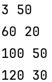

**Результат работы кода на максимальных и минимальных значениях:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input3.png"/>  |  <img src="task1/output3.png"/>  |

| Входные данные                                                 | Время выполнения |  Затраты памяти   |
|:---------------------------------------------------------------|:----------------:|:-----------------:|
| Нижняя граница диапазона значений входных данных (из условия)  | 0.00001 seconds  | 0.00015 megabytes |
| Пример из условия                                              | 0.00001 seconds  | 0.00015 megabytes |
| Пример из условия                                              | 0.00002 seconds  | 0.00015 megabytes |
| Верхняя граница диапазона значений входных данных (из условия) | 0.00044 seconds  | 0.03632 megabytes |

**Вывод по задаче:**

Реализовано решение задачи о дробном рюкзаке за время - O(NlogN) с использованием жадного подхода.

### **Задача №3. Максимальный доход от рекламы [0.5 балла]**


**Листинг кода:**

In [ ]:
@time_and_memory_decorator
def distribute_ads(prices, clicks):
    prices.sort()
    clicks.sort()

    max_profit = sum(p * c for p, c in zip(prices, clicks))

    return max_profit


def main():
    with open('task3/input.txt', 'r') as f:
        n = int(f.readline())
        a = [int(i) for i in f.readline().split()]
        b = [int(i) for i in f.readline().split()]

    result = distribute_ads(a, b)

    with open('task3/output.txt', 'w') as f:
        f.write(str(result))


main()


**Текстовое объяснение решения:**


**Результат работы кода на примерах из текста задачи:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input1.png"/>  |  <img src="task1/output1.png"/>  |
|  <img src="task1/input2.png"/>  |  <img src="task1/output2.png"/>  |

**Результат работы кода на максимальных и минимальных значениях:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input3.png"/>  |  <img src="task1/output3.png"/>  |

| Входные данные                                                 | Время выполнения | Затраты памяти |
|:---------------------------------------------------------------|:----------------:|:--------------:|
| Нижняя граница диапазона значений входных данных (из условия)  |                  |                |
| Пример из условия                                              |                  |                |
| Пример из условия                                              |                  |                |
| Верхняя граница диапазона значений входных данных (из условия) |                  |                |

**Вывод по задаче:**



### **Задача №1. [N балла]**


**Листинг кода:**

**Текстовое объяснение решения:**


**Результат работы кода на примерах из текста задачи:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input1.png"/>  |  <img src="task1/output1.png"/>  |
|  <img src="task1/input2.png"/>  |  <img src="task1/output2.png"/>  |

**Результат работы кода на максимальных и минимальных значениях:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input3.png"/>  |  <img src="task1/output3.png"/>  |

| Входные данные                                                 | Время выполнения | Затраты памяти |
|:---------------------------------------------------------------|:----------------:|:--------------:|
| Нижняя граница диапазона значений входных данных (из условия)  |                  |                |
| Пример из условия                                              |                  |                |
| Пример из условия                                              |                  |                |
| Верхняя граница диапазона значений входных данных (из условия) |                  |                |

**Вывод по задаче:**



### **Задача №1. [N балла]**


**Листинг кода:**

**Текстовое объяснение решения:**


**Результат работы кода на примерах из текста задачи:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input1.png"/>  |  <img src="task1/output1.png"/>  |
|  <img src="task1/input2.png"/>  |  <img src="task1/output2.png"/>  |

**Результат работы кода на максимальных и минимальных значениях:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input3.png"/>  |  <img src="task1/output3.png"/>  |

| Входные данные                                                 | Время выполнения | Затраты памяти |
|:---------------------------------------------------------------|:----------------:|:--------------:|
| Нижняя граница диапазона значений входных данных (из условия)  |                  |                |
| Пример из условия                                              |                  |                |
| Пример из условия                                              |                  |                |
| Верхняя граница диапазона значений входных данных (из условия) |                  |                |

**Вывод по задаче:**



### **Задача №1. [N балла]**


**Листинг кода:**

**Текстовое объяснение решения:**


**Результат работы кода на примерах из текста задачи:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input1.png"/>  |  <img src="task1/output1.png"/>  |
|  <img src="task1/input2.png"/>  |  <img src="task1/output2.png"/>  |

**Результат работы кода на максимальных и минимальных значениях:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input3.png"/>  |  <img src="task1/output3.png"/>  |

| Входные данные                                                 | Время выполнения | Затраты памяти |
|:---------------------------------------------------------------|:----------------:|:--------------:|
| Нижняя граница диапазона значений входных данных (из условия)  |                  |                |
| Пример из условия                                              |                  |                |
| Пример из условия                                              |                  |                |
| Верхняя граница диапазона значений входных данных (из условия) |                  |                |

**Вывод по задаче:**



<h1></h1>

<div align="center">

# **Дополнительные задачи**

</div>

---

### **Задача №1. [N балла]**


**Листинг кода:**

**Текстовое объяснение решения:**


**Результат работы кода на примерах из текста задачи:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input1.png"/>  |  <img src="task1/output1.png"/>  |
|  <img src="task1/input2.png"/>  |  <img src="task1/output2.png"/>  |

**Результат работы кода на максимальных и минимальных значениях:**

| <div align="center">input</div> | <div align="center">output</div> |
|:-------------------------------:|:--------------------------------:|
|  <img src="task1/input3.png"/>  |  <img src="task1/output3.png"/>  |

| Входные данные                                                 | Время выполнения | Затраты памяти |
|:---------------------------------------------------------------|:----------------:|:--------------:|
| Нижняя граница диапазона значений входных данных (из условия)  |                  |                |
| Пример из условия                                              |                  |                |
| Пример из условия                                              |                  |                |
| Верхняя граница диапазона значений входных данных (из условия) |                  |                |

**Вывод по задаче:**

